## Multi-Class Text Classification of products based on their description


In this project, I would like to demonstrate how one can do the text classification by using python, scikit-learn and NLTK library. These are real description about make-up products. Each description has been labeled with a specific product, therefore, this is a supervised text classification problem. The aim of the project is multi-class text classification of make-up products based on their description and categories. Based on given text as an input, we have predicted what would be the category. We have five types of categories corresponding to different makeup products. We used different machine learning algorithms to get more accurate predictions and choose the most accurate one for our issue. The following classification algorithms have been used: Logistic Regression, Multinomial Naive Bayes, Linear Support Vector Machine (LinearSVM), Random Forest and Gradient Boosting as well.


### Importing packages and loading data

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('C:\Python Scripts\API_products\products_final.csv', header=0,index_col=0)
df.head()

,brand,category,currency,description,id,name,price,price_sign,product_type,rating,tag_list
0,colourpop,pencil,CAD,Lippie Pencil A long-wearing and high-intensit...,1048,Lippie Pencil,5.0,$,lip_liner,NaN,"['Vegan', 'cruelty free']"
1,colourpop,lipstick,CAD,Blotted Lip Sheer matte lipstick that creates ...,1047,Blotted Lip,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
2,colourpop,lipstick,CAD,"Lippie Stix Formula contains Vitamin E, Mango,...",1046,Lippie Stix,5.5,$,lipstick,NaN,"['Vegan', 'cruelty free']"
3,colourpop,liquid,CAD,"Developed for the Selfie Age, our buildable fu...",1045,No Filter Foundation,12.0,$,foundation,NaN,"['Vegan', 'cruelty free']"
4,boosh,lipstick,CAD,All of our products are free from lead and hea...,1044,Lipstick,26.0,$,lipstick,NaN,"['Organic', 'Chemical Free']"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 930
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         919 non-null    object 
 1   category      507 non-null    object 
 2   currency      368 non-null    object 
 3   description   906 non-null    object 
 4   id            931 non-null    int64  
 5   name          931 non-null    object 
 6   price         917 non-null    float64
 7   price_sign    368 non-null    object 
 8   product_type  931 non-null    object 
 9   rating        340 non-null    float64
 10  tag_list      931 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 87.3+ KB


### Data Cleaning

For our analysis we use only two variables: product_type and description.

In [24]:
text_df = df[['product_type', 'description']]
text_df.head()

,product_type,description
0,lip_liner,Lippie Pencil A long-wearing and high-intensit...
1,lipstick,Blotted Lip Sheer matte lipstick that creates ...
2,lipstick,"Lippie Stix Formula contains Vitamin E, Mango,..."
3,foundation,"Developed for the Selfie Age, our buildable fu..."
4,lipstick,All of our products are free from lead and hea...


In [25]:
#shape of data:
text_df.shape

(931, 2)

In [26]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 930
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_type  931 non-null    object
 1   description   906 non-null    object
dtypes: object(2)
memory usage: 61.8+ KB


In [27]:
#missing values:
text_df.isnull().sum()

product_type     0
description     25
dtype: int64

In [8]:
text_df['description'][3]

'Developed for the Selfie Age, our buildable full coverage, natural matte foundation delivers flawless looking skin from day-to-night. The oil-free, lightweight formula blends smoothly and is easily customizable to create the coverage you want. Build it up or sheer it out, it was developed with innovative soft-blurring pigments to deliver true color while looking and feeling natural. The lockable pump is easy to use and keeps your routine mess-free! As always, 100% cruelty-free and vegan.'

Data type change:

In [28]:
text_df['description'] = text_df['description'].astype(str)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
print(text_df['description'].apply(lambda x: len(x.split(' '))).sum())

94282


We have 94 282 words in the data.

Remove rows with missing values:

In [30]:
text_df.dropna(subset=['description'], inplace=True)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
text_df.isnull().sum()

product_type    0
description     0
dtype: int64

Lenght of characters:

In [32]:
text_df['length'] = text_df['description'].apply(len)
text_df.head()

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,product_type,description,length
0,lip_liner,Lippie Pencil A long-wearing and high-intensit...,232
1,lipstick,Blotted Lip Sheer matte lipstick that creates ...,146
2,lipstick,"Lippie Stix Formula contains Vitamin E, Mango,...",188
3,foundation,"Developed for the Selfie Age, our buildable fu...",492
4,lipstick,All of our products are free from lead and hea...,357


In [33]:
text_df.product_type.unique()

array(['lip_liner', 'lipstick', 'foundation', 'eyeliner', 'eyeshadow',
       'blush', 'bronzer', 'mascara', 'eyebrow', 'nail_polish'],
      dtype=object)

#### Grouping data to a smaller number of categories:

We have 10 unique products and  some of them  we can group to one category. We can link 'eyeliner', 'eyeshadow', 'mascara', 'eyebrow' to one group called as 'eye_makeup'. We can apply the same to 'blush' and 'bronzer' as 'contour' and 'lipstick' with 'lip_liner' to 'lipstick'. 

In [34]:
text_df.product_type.value_counts()

foundation     166
lipstick       154
eyeliner       148
mascara         92
eyeshadow       86
blush           78
bronzer         69
nail_polish     60
eyebrow         49
lip_liner       29
Name: product_type, dtype: int64

In [35]:
text_df.loc[text_df['product_type'].isin(['lipstick','lip_liner']),'product_type'] = 'lipstick'
text_df.loc[text_df['product_type'].isin(['blush','bronzer']),'product_type'] = 'contour'
text_df.loc[text_df['product_type'].isin(['eyeliner','eyeshadow','mascara','eyebrow']),'product_type'] = 'eye_makeup'

C:\Users\PC\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


We have received a five group of categories:  Eye makeup, Lipstick, Foundation, Contour and Nail polish.

### Data analysis

We check proportion product_type variable:

In [36]:
text_df.product_type.value_counts()

eye_makeup     375
lipstick       183
foundation     166
contour        147
nail_polish     60
Name: product_type, dtype: int64

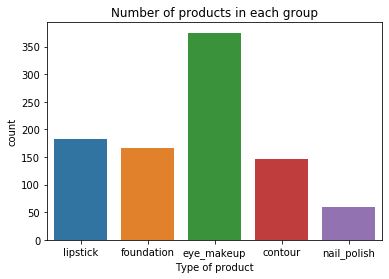

In [37]:
sns.countplot(x='product_type',data=text_df)
plt.xlabel('Type of product')
plt.title('Number of products in each group');

One can see that products from the eye makeup group is the largest one. It is over two times larger than in the lipstick group.

##### The length of characters in all categories:
Histogram of description length.

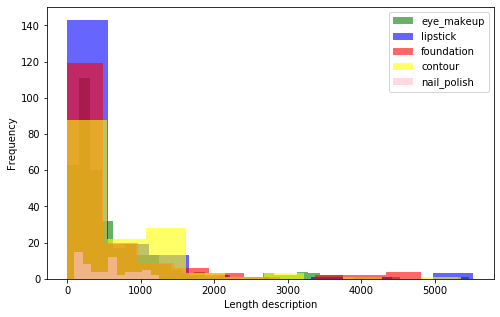

In [54]:
plt.figure(figsize=(8, 5))
text_df[text_df.product_type == 'eye_makeup'].length.plot(bins=35, kind='hist', color='green', label='eye_makeup', alpha=0.6)
text_df[text_df.product_type == 'lipstick'].length.plot(kind='hist', color='blue', label='lipstick', alpha=0.6)
text_df[text_df.product_type == 'foundation'].length.plot(kind='hist', color='red', label='foundation', alpha=0.6)
text_df[text_df.product_type == 'contour'].length.plot(kind='hist', color='yellow', label='contour', alpha=0.6)
text_df[text_df.product_type == 'nail_polish'].length.plot(kind='hist', color='pink', label='nail_polish', alpha=0.6)
plt.legend()
plt.xlabel("Length description");

##### The length of characters divided into categories:
Histogram of description length of each categories.

The largest description has almost 200 characters, some of them are very short.

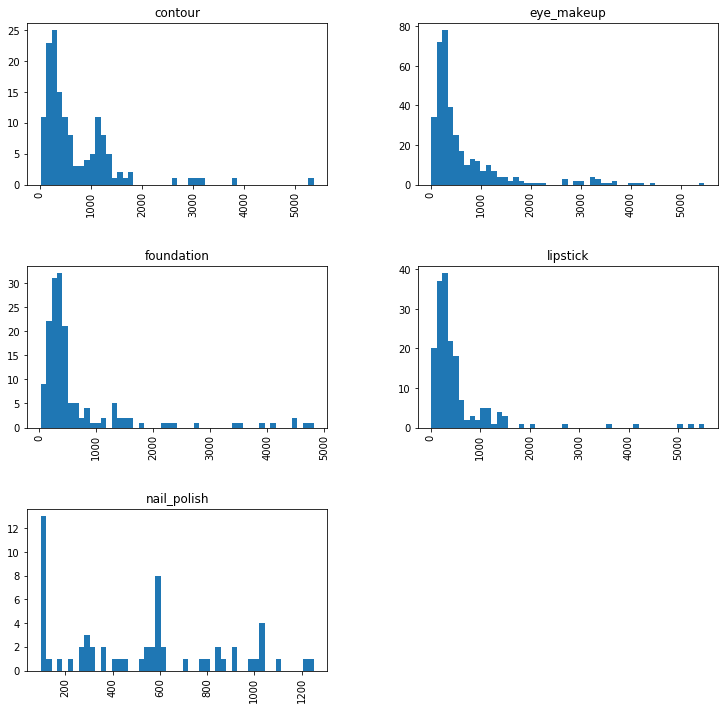

In [21]:
text_df.hist(column='length', by='product_type', bins=50,figsize=(12,12));

## Text Pre-processing

In this step we have to remove punctuation, stop words, bad characters and so on. The second step is aimed to convertion all of the words to lower case and then stemmed them using the Porter Stemmer in the NLTK package.

**Stemming** operation bundles together words of same root. E.g. stem operation bundles “fishing”,  and “fished” into a common "fish".

The functions to clean text, remove stop words and apply stemming operation for each line of text:

In [57]:
stop = stopwords.words('english')
print(stop[::10])

porter = PorterStemmer()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [58]:
def remove_punctuation(description):
    """The function to remove punctuation"""
    table = str.maketrans('', '', string.punctuation)
    return description.translate(table)

def remove_stopwords(text):
    """The function to removing stopwords"""
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def stemmer(stem_text):
    """The function to apply stemming"""
    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)


Apply the functions to each examples:

In [59]:
text_df['description'] = text_df['description'].apply(remove_punctuation)
text_df['description'] = text_df['description'].apply(remove_stopwords)
text_df['description'] = text_df['description'].apply(stemmer)

C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [60]:
text_df.head()

,product_type,description,length
0,lipstick,lippi pencil longwear highintens lip pencil gl...,232
1,lipstick,blot lip sheer matt lipstick creat perfect pop...,146
2,lipstick,lippi stix formula contain vitamin e mango avo...,188
3,foundation,develop selfi age buildabl full coverag natur ...,492
4,lipstick,product free lead heavi metal paraben phthalat...,357


In [61]:
text_df['description'][1]

'blot lip sheer matt lipstick creat perfect popsicl pout formula lightweight matt buildabl light medium coverag'

### Pos Tagging

To get the deeper insight to the way in which that word is used in speech, the Part of speech (POS) tagging method has been used. There are eight primary parts of speech and they each have a corresponding tag. The NLTK libary has a method to perform POS tagging. 

The example of Pos Tagging on analyzed data set is presented below: 

In [62]:
tokens = text_df['description'][0]

nltk.pos_tag(word_tokenize(tokens))

[('lippi', 'JJ'),
 ('pencil', 'NN'),
 ('longwear', 'JJ'),
 ('highintens', 'NNS'),
 ('lip', 'VBP'),
 ('pencil', 'NN'),
 ('glide', 'NN'),
 ('easili', 'FW'),
 ('prevent', 'NN'),
 ('feather', 'NN'),
 ('mani', 'NN'),
 ('lippi', 'NN'),
 ('stix', 'NN'),
 ('coordin', 'NN'),
 ('lippi', 'NN'),
 ('pencil', 'NN'),
 ('design', 'NN'),
 ('compliment', 'NN'),
 ('perfectli', 'NN'),
 ('feel', 'VB'),
 ('free', 'JJ'),
 ('mix', 'NN'),
 ('match', 'NN')]

### Bag of words

To run machine learning algorithms we need to convert the text files into numerical feature vectors. We will use bag of words model for our analysis. In general we segment each text file into words  and count of times each word occurs in each document and finally assign each word an integer id. Each unique word in our dictionary will correspond to a feature (descriptive feature).

More precisely we will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized tf-idf representation (tf-idf transformer). 


#### CountVectorizer 

In [63]:
vectorizer = CountVectorizer()
vectorizer.fit(text_df['description'])
vector = vectorizer.transform(text_df['description'])

In [64]:
print(vector.shape)
print(vector.toarray())

(931, 5892)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### TF-IDF
Term Frequency–Inverse Document Frequency

In [65]:
# extract the tfid representation matrix of the text data
tfidf_converter = TfidfTransformer()
X_tfidf = tfidf_converter.fit_transform(vector).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Spliting the data into train and test sets:

In [66]:
X = text_df['description']
y = text_df['product_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((698,), (233,), (698,), (233,))

### Models

We used the Multi-Classification models.

The classification models evaluated are:
- Logistic Regression,
- Linear Support Vector Machine,
- Multinomial Naive Bayes.
- Random Forest
- Gradient Boosting

#### Pipeline

We build a pipeline. We can write less code and do all of the above, by building a pipeline as follows.

To make the vectorizer => transformer => classifier easier to work with, we will use Pipeline class in Scilkit-Learn.

#### Logistic Regression

We build and train Logistic Regression model:

In [68]:
model_log = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                      ('tfidf', TfidfTransformer()),
                      ('model',LogisticRegression()),
                     ])

model_log.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_log.predict(X_test)

The confusion matrix and classification report(precision, recall, F1-score):

In [69]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.9055793991416309
              precision    recall  f1-score   support

     contour       1.00      0.88      0.93        40
  eye_makeup       0.85      0.98      0.91        91
  foundation       0.84      0.80      0.82        40
    lipstick       1.00      0.91      0.95        45
 nail_polish       1.00      0.82      0.90        17

    accuracy                           0.91       233
   macro avg       0.94      0.88      0.90       233
weighted avg       0.91      0.91      0.91       233



**SVM**

In [70]:
svc = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('model',LinearSVC()),
               ])

svc.fit(X_train, y_train)

ytest = np.array(y_test)
y_pred = svc.predict(X_test)

In [71]:
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(ytest, y_pred))

accuracy 0.927038626609442
              precision    recall  f1-score   support

     contour       1.00      0.93      0.96        40
  eye_makeup       0.90      0.97      0.93        91
  foundation       0.85      0.82      0.84        40
    lipstick       0.98      0.91      0.94        45
 nail_polish       1.00      1.00      1.00        17

    accuracy                           0.93       233
   macro avg       0.94      0.93      0.93       233
weighted avg       0.93      0.93      0.93       233



#### Naive Bayes Classifier for Multinomial Models

In [72]:
nbc = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('model',MultinomialNB()),
               ])

nbc.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = nbc.predict(X_test)

In [73]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.8583690987124464
              precision    recall  f1-score   support

     contour       0.97      0.75      0.85        40
  eye_makeup       0.79      0.99      0.88        91
  foundation       0.82      0.78      0.79        40
    lipstick       0.97      0.84      0.90        45
 nail_polish       1.00      0.65      0.79        17

    accuracy                           0.86       233
   macro avg       0.91      0.80      0.84       233
weighted avg       0.88      0.86      0.86       233



**Random Forest**

In [76]:
rf = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
               ('tfidf', TfidfTransformer()),
               ('rf', RandomForestClassifier(n_estimators=50)),
               ])

rf.fit(X_train, y_train)

ytest = np.array(y_test)
preds = rf.predict(X_test)

In [77]:
print('accuracy %s' % accuracy_score(preds, y_test))
print(classification_report(ytest, preds))

accuracy 0.9098712446351931
              precision    recall  f1-score   support

     contour       0.97      0.90      0.94        40
  eye_makeup       0.86      0.97      0.91        91
  foundation       0.84      0.80      0.82        40
    lipstick       1.00      0.87      0.93        45
 nail_polish       1.00      1.00      1.00        17

    accuracy                           0.91       233
   macro avg       0.94      0.91      0.92       233
weighted avg       0.91      0.91      0.91       233



**Gradient Boosting**

In [82]:
model_gb = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,2))),
                    ('tfidf', TfidfTransformer()),
                    ('gb', GradientBoostingClassifier(n_estimators=50)),
                    ])

model_gb.fit(X_train, y_train)

ytest = np.array(y_test)
predicted = model_gb.predict(X_test)

In [83]:
print('accuracy %s' % accuracy_score(predicted, y_test))
print(classification_report(ytest, predicted))

accuracy 0.9055793991416309
              precision    recall  f1-score   support

     contour       0.94      0.85      0.89        40
  eye_makeup       0.87      0.99      0.93        91
  foundation       0.89      0.82      0.86        40
    lipstick       0.95      0.82      0.88        45
 nail_polish       0.94      1.00      0.97        17

    accuracy                           0.91       233
   macro avg       0.92      0.90      0.91       233
weighted avg       0.91      0.91      0.90       233



### Model evaluation

#### GridSearch

Tuning Multinomial Naive Bayes Classifier.

This kind of hyper-parameters as n-grams range, IDF usage, TF-IDF normalization type and Naive Bayes alpha were tunned using grid search.

In [84]:
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'mnb__alpha': (1e-2, 1e-3),
}

In [85]:
gs_nb = GridSearchCV(nbc, parameters, n_jobs=-1)
gs_nb = gs_nb.fit(X_train, y_train)

In [86]:
gs_nb.best_score_

0.8796916752312436

In [87]:
#optimum parameter:
gs_nb.best_params_

{'mnb__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 1)}

Now we build final model with received best_params:

In [101]:
nb_grid = Pipeline([('vect', CountVectorizer(min_df=5, ngram_range=(1,1))),
               ('tfidf', TfidfTransformer(use_idf=False)),
               ('model',MultinomialNB(alpha=0.01)),
               ])

nb_grid.fit(X_train, y_train)

pred_grid = nb_grid.predict(X_test)

In [102]:
print('accuracy %s' % accuracy_score(pred_grid, y_test))
print(classification_report(ytest, pred_grid))

accuracy 0.9012875536480687
              precision    recall  f1-score   support

     contour       0.97      0.80      0.88        40
  eye_makeup       0.88      0.96      0.92        91
  foundation       0.84      0.80      0.82        40
    lipstick       0.91      0.96      0.93        45
 nail_polish       1.00      0.94      0.97        17

    accuracy                           0.90       233
   macro avg       0.92      0.89      0.90       233
weighted avg       0.90      0.90      0.90       233



According to the grid search results the accuracy has now increased to 0,90 for the Naive Bayes Classifier. 

**Best model**

We have tested several different models and now, we check which one is the best:

In [103]:
log_acc = accuracy_score(pred, y_test)
svm_acc = accuracy_score(y_pred, y_test)
nb_acc = accuracy_score(pred_y, y_test)
rf_acc = accuracy_score(preds, y_test)
gb_acc = accuracy_score(predicted, y_test)
nb_grid_acc = accuracy_score(pred_grid, y_test)

In [104]:
models = pd.DataFrame({
                      'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'Gradient Boosting', 'Grid Search_NB'],
                      'Score': [log_acc, svm_acc, nb_acc, rf_acc, gb_acc, nb_grid_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,SVM,0.927039
3,Random Forest,0.909871
0,Logistic Regression,0.905579
4,Gradient Boosting,0.905579
5,Grid Search_NB,0.901288
2,Naive Bayes,0.858369


### Conclusion

This project was aimed to the text classification by using python, scikit-learn and NLTK libraries. We started with the data engineering and text pre-processing, which cover the remove punctuation, stop words and stemming operation as well. Next we used bag of words model to convert the text files into numerical feature vectors. Finally we started training 5 different  Classification models, we have choosen one of them (Naive Bayes - NB) and applied further evaluation for it. By using Grid Search for NB classifier we got the accuracy of 0.90 but it was smaller than the other models without the evaluation. The best accuracy was obtained for the Linear SVM model (0.93) and was not much bigger than other models.
